### Task Advanced 3 
Typically, data to be analyzed in real world applications is not fully clean. Frequently, there are missing fields, invalid values, etc. 

A civil engineer is working in the design of a bridge, trying to find different alternatives, each of them having a total bridge weight and the degree of deformation in certain parts. After using an optimization software, she/he has obtained a .tsv file (attached to this task) with a number of rows indicating different trade-off designs. A plot of this file should look like like this graph:

Unfortunately, some lines/fields have invalid values (blank lines, missing values, characters instead of numbers, etc), and there are also repeteated lines.

This task consists in developing a Jupyter notebook with PySpark to read the file, remove all the invalid lines and remove those that are appears more than one time, and plot the clean data.

The deliverable will be the Jupyter notebook.

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 15 12:11:51 2018

@author: Juan Miguel
"""

from pyspark.sql import SparkSession
from pyspark.sql.types import *

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Get or Create SparkSession.

In [42]:
   spark_session = SparkSession.builder \
          .appName("cleaning Dataframe") \
          .getOrCreate()
    


#### We load the data from TSV file, and we set StructType of the Dataframe with DoubleType StructField. Now, We only have doubleType rows like we wanted to.


In [44]:
# We set structfield columns to DoubleType thus, we eliminate String rows.

schema = StructType([StructField('weight', DoubleType(),False), \
                        StructField('Deformation', DoubleType(), False)])

   
dataBrigde = spark_session.read.csv(
        path='C:/DATOS/MASTER BIG DATA/Master Big Data/Modulo 9 ApacheSpark/py/Task/AdvancedTask3/bridge.tsv',
        sep=" ",
        encoding='UTF-8',
        comment=None,
        header=True,
        schema=schema)


#### Inspecting the data.


In [41]:
dataBrigde.show(n=25, truncate=False)

+-------------------+-------------------+
|weight             |Deformation        |
+-------------------+-------------------+
|0.1600004095193499 |0.599999565925713  |
|0.7999996334783612 |0.105573019041743  |
|0.3474026835213373 |0.41059125458931517|
|0.3409188533102768 |0.4161174319177898 |
|0.33448446398543363|0.4216536843155324 |
|0.35390522300019   |0.4051006617019322 |
|0.3280925245214544 |0.42720638686411727|
|0.3217358217215534 |0.43278238841939665|
|0.36039794488768706|0.3996684723945372 |
|0.3154172733712044 |0.4383797783455403 |
|0.3669234753668437 |0.3942579191642874 |
|0.37345638999357544|0.3888892255982278 |
|0.3091488764126171 |0.44398842406579203|
|0.3800121516706126 |0.38354874656944227|
|0.30295098086750766|0.44959017652156535|
|0.2967605824612727 |null               |
|0.38657333470529276|0.3782497818184258 |
|0.29063517731969263|0.4608941011769619 |
|0.28454896813201636|0.46656868557912423|
|0.39313313091886176|0.3729967066807797 |
|0.27851604294199267|0.47225381298

#### Eliminate Null Rows.

In [72]:
# We can see several null rows.
dataBrigde_clean_null =dataBrigde.na.drop('any')

dataBrigde_clean_null.show()


+-------------------+-------------------+
|             weight|        Deformation|
+-------------------+-------------------+
| 0.1600004095193499|  0.599999565925713|
| 0.7999996334783612|  0.105573019041743|
| 0.3474026835213373|0.41059125458931517|
| 0.3409188533102768| 0.4161174319177898|
|0.33448446398543363| 0.4216536843155324|
|   0.35390522300019| 0.4051006617019322|
| 0.3280925245214544|0.42720638686411727|
| 0.3217358217215534|0.43278238841939665|
|0.36039794488768706| 0.3996684723945372|
| 0.3154172733712044| 0.4383797783455403|
| 0.3669234753668437| 0.3942579191642874|
|0.37345638999357544| 0.3888892255982278|
| 0.3091488764126171|0.44398842406579203|
| 0.3800121516706126|0.38354874656944227|
|0.30295098086750766|0.44959017652156535|
|0.38657333470529276| 0.3782497818184258|
|0.29063517731969263| 0.4608941011769619|
|0.28454896813201636|0.46656868557912423|
|0.39313313091886176| 0.3729967066807797|
|0.27851604294199267| 0.4722538129822601|
+-------------------+-------------

#### Eliminate duplicate Rows.

In [73]:
data_cleaned_Brigde = dataBrigde_clean_null.drop_duplicates()

dataBrigde_clean_null.show()

+-------------------+-------------------+
|             weight|        Deformation|
+-------------------+-------------------+
| 0.1600004095193499|  0.599999565925713|
| 0.7999996334783612|  0.105573019041743|
| 0.3474026835213373|0.41059125458931517|
| 0.3409188533102768| 0.4161174319177898|
|0.33448446398543363| 0.4216536843155324|
|   0.35390522300019| 0.4051006617019322|
| 0.3280925245214544|0.42720638686411727|
| 0.3217358217215534|0.43278238841939665|
|0.36039794488768706| 0.3996684723945372|
| 0.3154172733712044| 0.4383797783455403|
| 0.3669234753668437| 0.3942579191642874|
|0.37345638999357544| 0.3888892255982278|
| 0.3091488764126171|0.44398842406579203|
| 0.3800121516706126|0.38354874656944227|
|0.30295098086750766|0.44959017652156535|
|0.38657333470529276| 0.3782497818184258|
|0.29063517731969263| 0.4608941011769619|
|0.28454896813201636|0.46656868557912423|
|0.39313313091886176| 0.3729967066807797|
|0.27851604294199267| 0.4722538129822601|
+-------------------+-------------

#### Lastly, we have the data clean.

In [88]:
# Pass to Panda.
dataframepandas_cleaned_Brigde = data_cleaned_Brigde.toPandas()
    
print(dataframepandas_cleaned_Brigde.describe())


          weight  Deformation
count  97.000000    97.000000
mean    0.464048     0.334505
std     0.191729     0.146236
min     0.160000     0.105573
25%     0.290635     0.207571
50%     0.459155     0.322391
75%     0.627943     0.460894
max     0.800000     0.600000


#### Plotting dataframe.


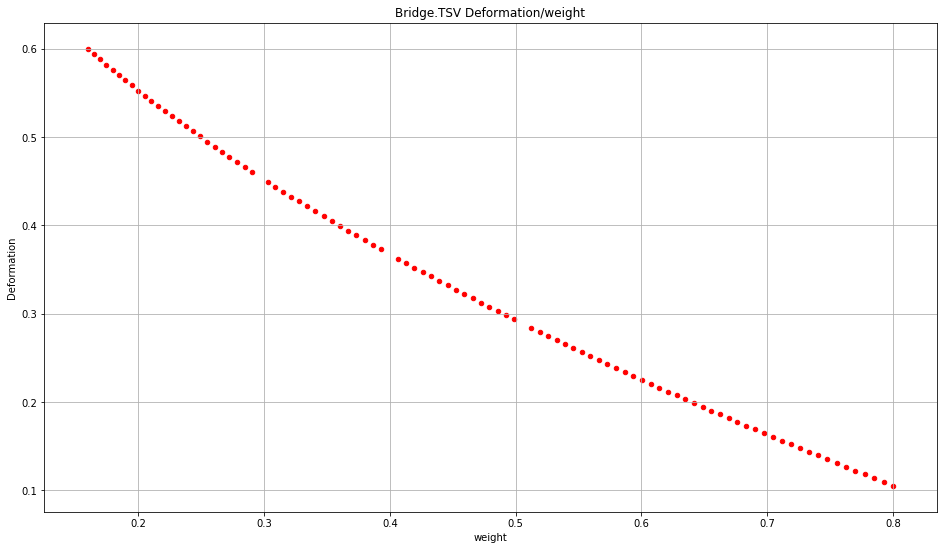

In [86]:
dataframepandas_cleaned_Brigde.plot.scatter(x='weight',
                                            y='Deformation',
                                            figsize =(16,9),
                                            grid =True,
                                            title ='Bridge.TSV Deformation/weight',
                                            marker = 'o',
                                            color = 'red')
plt.show()